In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

In [12]:
df = pd.read_csv('stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df.shape

(5110, 12)

In [14]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df['bmi'].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
48.0     1
49.4     1
47.4     1
46.6     1
54.0     1
Name: bmi, Length: 418, dtype: int64

In [17]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [20]:
import seaborn as sns

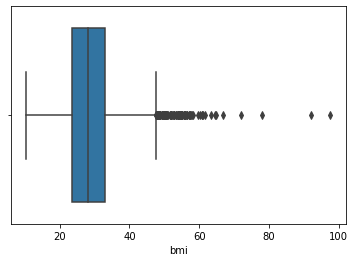

In [21]:
sns.boxplot(x=df['bmi'])
plt.show()

In [22]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Dropping ID

In [24]:
df = df.iloc[:,1:]
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [79]:
# df['stroke'].value_counts(normalize=True)
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [29]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

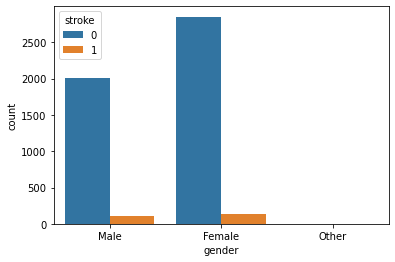

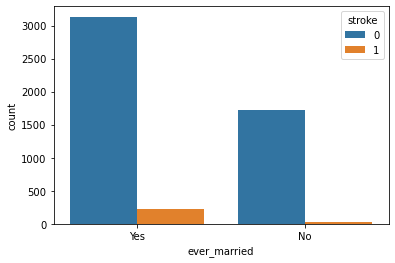

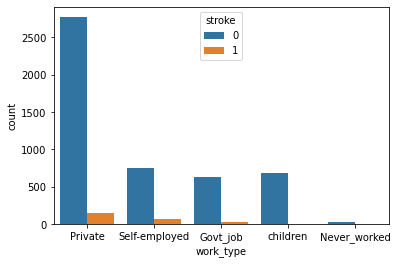

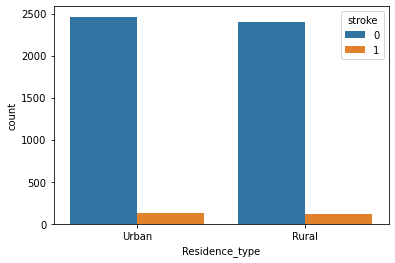

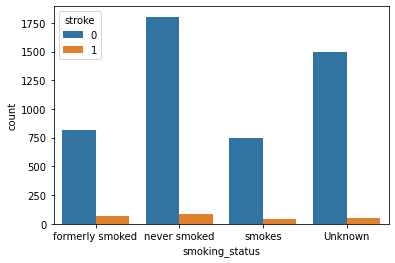

In [31]:
for i in cat_cols:
    sns.countplot(x=df[i],hue=df['stroke'])
    plt.show()

In [ ]:
#### Infernce


In [32]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

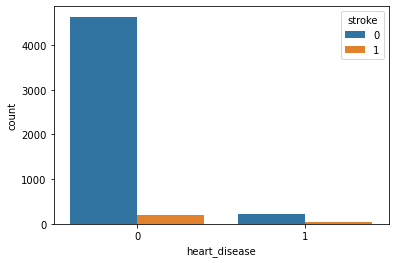

In [69]:
sns.countplot(x=df['heart_disease'],hue=df['stroke'])
plt.show()

#### Corr

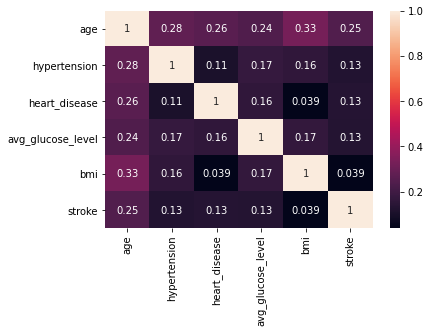

In [35]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [36]:
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


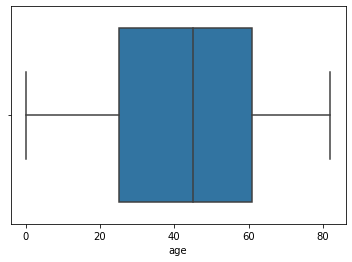

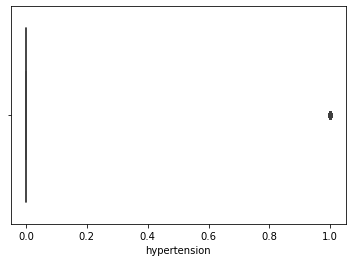

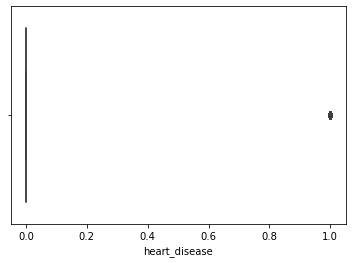

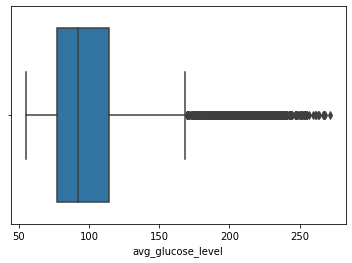

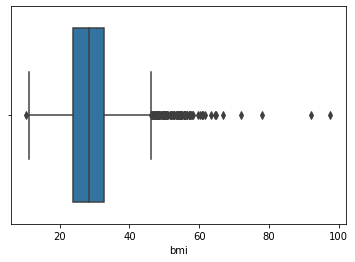

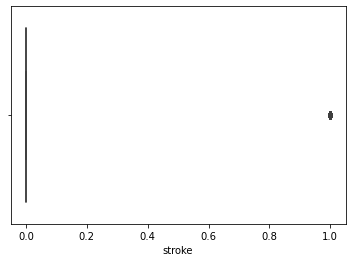

In [37]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

#### Inference
1) avg glucose level and bmi has outliers beyond q3

In [ ]:
#### Univariate
# 1) boxplot,violinplot
# 2) describe
# 3) barchart, histplot,displot

### Bivariate Analysis
# num-num  - scatterplot, pairplot
# num-cat  - groupby+agg, 
# cat-cat -  chi square, countplot with hue

# 

In [38]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,5110.0,43.226614,22.612647,0.08,1.0800,1.7344,2.0000,5.0000,45.000,79.0000,80.0000,81.0000,82.0000,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.0000,0.0000,0.0000,0.0000,0.000,1.0000,1.0000,1.0000,1.0000,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.0000,0.0000,0.0000,0.0000,0.000,1.0000,1.0000,1.0000,1.0000,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,56.3309,57.4354,58.5208,60.7135,91.885,216.2945,226.8692,231.9158,240.7082,271.74
bmi,5110.0,28.893237,7.698018,10.30,15.1090,16.2000,16.7270,17.7000,28.400,42.6550,45.1000,48.0820,52.8910,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,1.0000,1.0000,1.0000,1.00


In [45]:
def outlier_treat(x):
    x = x.clip(upper = x.quantile(0.97))
    return x

In [46]:
cols_with_ol =  ['avg_glucose_level','bmi']
df[cols_with_ol] = df[cols_with_ol].apply(outlier_treat)

#### Binning

In [39]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [41]:
df['age_bin'] = pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80,90])
df['age_bin'].value_counts()

(50, 60]    823
(40, 50]    739
(30, 40]    674
(60, 70]    594
(70, 80]    594
(20, 30]    545
(10, 20]    518
(0, 10]     507
(80, 90]    116
Name: age_bin, dtype: int64

In [43]:
df.groupby(['age_bin','stroke'])['stroke'].count()

age_bin   stroke
(0, 10]   0         506
          1           1
(10, 20]  0         517
          1           1
(20, 30]  0         545
          1           0
(30, 40]  0         668
          1           6
(40, 50]  0         724
          1          15
(50, 60]  0         774
          1          49
(60, 70]  0         545
          1          49
(70, 80]  0         489
          1         105
(80, 90]  0          93
          1          23
Name: stroke, dtype: int64

In [47]:
df.dtypes

gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
age_bin              category
dtype: object

In [49]:
cat_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [59]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_bin'],
      dtype='object')

In [72]:
# r = [10,20,30,40,50]
# r[:-2]

In [62]:
# x = df.iloc[:,[0,1,2,3,4,5,7,8,9,10,11]]  # df.drop('Residence_type',axis=1)
x = df.iloc[:,:-2] 
y = df.iloc[:,-2] 
print(x.shape)
print(y.shape)

(5110, 10)
(5110,)


In [64]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3832, 10)
(1278, 10)
(3832,)
(1278,)


In [73]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [74]:
m1 = MultinomialNB()
model_metrics(m1,x_train,x_test,y_train,y_test)

Training score 0.8233298538622129
Testing score 0.8137715179968701
Predictions [0 0 0 ... 1 0 0]
[[1010  188]
 [  50   30]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1198
           1       0.14      0.38      0.20        80

    accuracy                           0.81      1278
   macro avg       0.55      0.61      0.55      1278
weighted avg       0.90      0.81      0.85      1278



In [76]:
from collections import Counter

In [78]:
train_stroke_count = Counter(y_train)
print(train_stroke_count)
test_stroke_count = Counter(y_test)
print(test_stroke_count)

Counter({0: 3663, 1: 169})
Counter({0: 1198, 1: 80})


### SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)
print(x_sm.shape)
print(y_sm.shape)

(7326, 10)
(7326,)


In [82]:
train_smote_count = Counter(y_sm)
print(train_smote_count)

Counter({0: 3663, 1: 3663})


#### Model Building after SMOTE

In [83]:
model_metrics(m1,x_sm,x_test,y_sm,y_test)

Training score 0.7383292383292384
Testing score 0.6830985915492958
Predictions [0 0 0 ... 1 0 0]
[[823 375]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      1198
           1       0.12      0.62      0.20        80

    accuracy                           0.68      1278
   macro avg       0.54      0.66      0.50      1278
weighted avg       0.91      0.68      0.76      1278



#### RandomForest Classifier

In [84]:
m2 = RandomForestClassifier(n_estimators=70,criterion='gini',min_samples_split=20)
model_metrics(m2,x_sm,x_test,y_sm,y_test)

Training score 0.9706524706524706
Testing score 0.8881064162754304
Predictions [0 0 0 ... 0 0 0]
[[1114   84]
 [  59   21]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1198
           1       0.20      0.26      0.23        80

    accuracy                           0.89      1278
   macro avg       0.57      0.60      0.58      1278
weighted avg       0.90      0.89      0.90      1278



In [87]:
def model_metrics2(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    acc_scr = accuracy_score(y_test,ypred)
    pre_scr = precision_score(y_test,ypred)
    rec_scr = recall_score(y_test,ypred)
    cm = confusion_matrix(y_test,ypred)
    cls_rep = classification_report(y_test,ypred)
    return cm,cls_rep, acc_scr,pre_scr,rec_scr

In [88]:
m2 = RandomForestClassifier(n_estimators=70,criterion='gini',min_samples_split=20)
rf_cm,rf_cls_rep,rf_acc,rf_pre,rf_rec = model_metrics2(m2,x_sm,x_test,y_sm,y_test)

In [98]:
res1 = pd.DataFrame({'Model':'RF+SMOTE','Acc':rf_acc,'Pre':rf_pre,'Rec':rf_rec},index=[0])
res1

,Model,Acc,Pre,Rec
0,RF+SMOTE,0.892019,0.221154,0.2875


#### Decision Tree Classification

In [101]:
m3 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=15)
dt_cm,dt_cls_rep,dt_acc,dt_pre,dt_rec = model_metrics2(m3,x_sm,x_test,y_sm,y_test)

In [102]:
res2 = pd.DataFrame({'Model':'DT+SMOTE','Acc':dt_acc,'Pre':dt_pre,'Rec':dt_rec},index=[1])
res2

,Model,Acc,Pre,Rec
1,DT+SMOTE,0.77856,0.11985,0.4


In [103]:
res = pd.concat([res1,res2])
res

,Model,Acc,Pre,Rec
0,RF+SMOTE,0.892019,0.221154,0.2875
1,DT+SMOTE,0.778560,0.119850,0.4000


In [104]:
# res.to_csv('Stroke_model_results.csv')

In [107]:
m4 = KNeighborsClassifier(n_neighbors=19)
knn_cm,knn_cls_rep,knn_acc,knn_pre,knn_rec = model_metrics2(m4,x_sm,x_test,y_sm,y_test)

In [108]:
res3 = pd.DataFrame({'Model':'KNN+SMOTE','Acc':knn_acc,'Pre':knn_pre,'Rec':knn_rec},index=[2])
res3

,Model,Acc,Pre,Rec
2,KNN+SMOTE,0.753521,0.153392,0.65


In [109]:
res = pd.concat([res,res3])
res

,Model,Acc,Pre,Rec
0,RF+SMOTE,0.892019,0.221154,0.2875
1,DT+SMOTE,0.778560,0.119850,0.4000
2,KNN+SMOTE,0.753521,0.153392,0.6500


In [110]:
m5 = MultinomialNB()
mnb_cm,mnb_cls_rep,mnb_acc,mnb_pre,mnb_rec = model_metrics2(m5,x_sm,x_test,y_sm,y_test)

In [111]:
res4 = pd.DataFrame({'Model':'MNB+SMOTE','Acc':mnb_acc,'Pre':mnb_pre,'Rec':mnb_rec},index=[3])
res4

,Model,Acc,Pre,Rec
3,MNB+SMOTE,0.683099,0.117647,0.625


In [112]:
res = pd.concat([res,res4])
res

,Model,Acc,Pre,Rec
0,RF+SMOTE,0.892019,0.221154,0.2875
1,DT+SMOTE,0.778560,0.119850,0.4000
2,KNN+SMOTE,0.753521,0.153392,0.6500
3,MNB+SMOTE,0.683099,0.117647,0.6250


In [113]:
res.to_csv('stroke_models_res.csv')